# Pythonでの代表値の求め方

度数分布表とヒストグラムで使用したサンプルデータについて代表値を求めます．
データフレームを前提として処理を進めるために，pandasライブラリーを搬入します．

```Python
import pandas as pd
```

In [1]:
import pandas as pd

サンプルデータからデータフレームを生成します．
データフレームを作成するためには<font color=green>pandas.DataFrame</font>関数を使用します．
変量としては，身長をカラム名 height に格納し，その階級値は計算によって求めてカラム名 heightClass に格納します．

```Python
sample = [
    144.5, 146.5, 147.5, 149.0, 150.0, 152.6, 153.2, 154.5, 154.8, 155.6, 
    156.0, 156.6, 157.2, 158.1, 158.8, 159.8, 160.1, 160.8, 161.5, 162.2, 
    162.7, 163.0, 163.6, 164.0, 165.3, 166.0, 166.4, 166.7, 167.0, 167.4, 
    167.8, 168.2, 169.8, 170.2, 170.5, 171.3, 171.8, 172.8, 173.3, 174.0, 
    174.2, 175.1, 175.3, 175.6, 176.3, 177.7, 179.8, 183.3, 184.4, 187.0]
df = pd.DataFrame(sample,columns=['height'])
df['heightClass'] = round((df.height+2.51)/5)*5-2.5
df.head()
```

In [2]:
sample = [
    144.5, 146.5, 147.5, 149.0, 150.0, 152.6, 153.2, 154.5, 154.8, 155.6, 
    156.0, 156.6, 157.2, 158.1, 158.8, 159.8, 160.1, 160.8, 161.5, 162.2, 
    162.7, 163.0, 163.6, 164.0, 165.3, 166.0, 166.4, 166.7, 167.0, 167.4, 
    167.8, 168.2, 169.8, 170.2, 170.5, 171.3, 171.8, 172.8, 173.3, 174.0, 
    174.2, 175.1, 175.3, 175.6, 176.3, 177.7, 179.8, 183.3, 184.4, 187.0]
df = pd.DataFrame(sample,columns=['height'])
df['heightClass'] = round((df.height+2.51)/5)*5-2.5
df.head()

,height,heightClass
0,144.5,142.5
1,146.5,147.5
2,147.5,147.5
3,149.0,147.5
4,150.0,152.5


### 平均値の算出

平均値は変量の<font color=green>mean()</font>メソッドによって求まります．

```Python
df.height.mean()
```

In [3]:
df.height.mean()

164.996

### 中央値の算出

中央値は変量の<font color=green>median()</font>メソッドによって求まります．

```Python
df.height.median()
```

In [4]:
df.height.median()

165.65

### 最頻値の算出

最頻値は変量の<font color=green>mode()</font>メソッドによって求まります．
ただし，対象となる変量は階級値 heightClass です．

```Python
df.heightClass.mode()
```

In [5]:
df.heightClass.mode()

0    167.5
dtype: float64

*****
## データ分布と代表値

ここで求めた3つの代表値をヒストグラム上にプロットしてみます．
度数分布表とヒストグラムのプログラムを再度実行します．

まず，グラフ用のライブラリーを搬入します．

```Python
import matplotlib.pyplot as plt
%matplotlib inline
```

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

身長の階級値ごとに頻度を集計したデータで新しいデータフレームを作成します．

```Python
fdt = pd.DataFrame(df['heightClass'].value_counts())
fdt.rename(columns={'heightClass':'frequency'},inplace=True)
fdt.sort_index(inplace=True)
```

In [7]:
fdt = pd.DataFrame(df['heightClass'].value_counts())
fdt.rename(columns={'heightClass':'frequency'},inplace=True)
fdt.sort_index(inplace=True)

代表値の直線を引くために作図のプログラムに次の4行を追加します．
垂直線を引くために，<font color=green>plt.vlines()</font>関数を追加します．
平均値，中央値および最頻値の3本の破線を引いています．
それぞれの直線の凡例を表示するために，<font color=green>plt.legend()</font>関数を追加します．

```Python
plt.bar(fdt.index,fdt.frequency,width=5,color='lightcyan',edgecolor='black')
plt.vlines(df.height.mean(),0,9.5,color='blue',linestyles='dashed',label='mean')
plt.vlines(df.height.median(),0,9.5,color='green',linestyles='dashed',label='median')
plt.vlines(df['heightClass'].mode()[0],0,9.5,color='red',linestyles='dashed',label='mode')
plt.legend()
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()
```

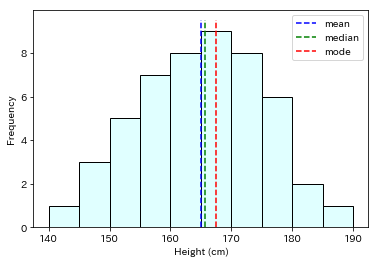

In [8]:
plt.bar(fdt.index,fdt.frequency,width=5,color='lightcyan',edgecolor='black')
plt.vlines(df.height.mean(),0,9.5,color='blue',linestyles='dashed',label='mean')
plt.vlines(df.height.median(),0,9.5,color='green',linestyles='dashed',label='median')
plt.vlines(df['heightClass'].mode()[0],0,9.5,color='red',linestyles='dashed',label='mode')
plt.legend()
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

この例では平均値，中央値，最頻値が近い値になっていますが，その理由はデータの分布が中心部分が盛り上がっているためです．
データの分布によっては，それぞれの代表値の特徴が顕著になります．

*****